In [3]:
# Reading csv file
import pandas as pd 
import numpy as np 

# Loading train and test datasets
import cv2 
import os

# One - hot Category
from sklearn.preprocessing import LabelEncoder 
from keras.utils.np_utils import to_categorical

import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers.core import Flatten, Dense
from keras.layers.convolutional import Conv2D, MaxPooling2D, AveragePooling2D
import visualkeras as vk 
from tensorflow.keras.layers import BatchNormalization, Dropout
from keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img,img_to_array
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, CSVLogger

import matplotlib.pyplot as plt
from numpy import argmax

from sklearn.metrics import classification_report,confusion_matrix
import seaborn as sn

In [2]:
!pip install visualkeras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 989.8/989.8 kB 14.8 MB/s eta 0:00:00a 0:00:01


In [4]:
label=pd.read_csv('/kaggle/input/devanagari64x64/devanagari.csv')
Y_train = np.array(label.iloc[0:46,0:3])
print(Y_train[0:46])

[[1 'ka' 'क']
 [2 'kha' 'ख']
 [3 'ga' 'ग']
 [4 'gha' 'घ']
 [5 'kna' 'ङ']
 [6 'cha' 'च']
 [7 'chha' 'छ']
 [8 'ja' 'ज']
 [9 'jha' 'झ']
 [10 'yna' 'ञ']
 [11 'ta' 'ट']
 [12 'tha' 'ठ']
 [13 'da' 'ड']
 [14 'dha' 'ढ']
 [15 'ana' 'ण']
 [16 'taa' 'त']
 [17 'thaa' 'थ']
 [18 'daa' 'द']
 [19 'dhaa' 'ध']
 [20 'na' 'न']
 [21 'pa' 'प']
 [22 'pha' 'फ']
 [23 'ba' 'ब']
 [24 'bha' 'भ']
 [25 'ma' 'म']
 [26 'ya' 'य']
 [27 'ra' 'र']
 [28 'la' 'ल']
 [29 'va' 'व']
 [30 'motosaw' 'श']
 [31 'petchiryosaw' 'ष']
 [32 'patalosaw' 'स']
 [33 'ha' 'ह']
 [34 'ksha' 'क्ष']
 [35 'tra' 'त्र']
 [36 'gya' 'ज्ञ']
 [37 '0' '०']
 [38 '1' '१']
 [39 '2' '२']
 [40 '3' '३']
 [41 '4' '४']
 [42 '5' '५']
 [43 '6' '६']
 [44 '7' '७']
 [45 '8' '८']
 [46 '9' '९']]


In [5]:
x_train = []
y_train = []

dimension = (28,28)
for j in range(1,47,1):
    for i in range(1,1701,1):
        img = cv2.imread('/kaggle/input/devanagari64x64/1_Training/'+str(j)+'/'+str(j)+' '+ '('+str(i) +')' +'.png')
        gray_image = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
        x_train.append(gray_image)
        y_train.append(j)
    print(str(j)+'\t')

1	
2	
3	
4	
5	
6	
7	
8	
9	
10	
11	
12	
13	
14	
15	
16	
17	
18	
19	
20	
21	
22	
23	
24	
25	
26	
27	
28	
29	
30	
31	
32	
33	
34	
35	
36	
37	
38	
39	
40	
41	
42	
43	
44	
45	
46	


In [6]:
x_validation = []
y_validation = []

dimension = (28,28)
for j in range(1,47,1):
    for i in range(1,301,1):
        img = cv2.imread('/kaggle/input/devanagari64x64/2_Validation/'+str(j)+'/'+str(j)+' '+ '('+str(i) +')' +'.png')
        gray_image = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
        x_validation.append(gray_image)
        y_validation.append(j)
    print(str(j)+'\t')

1	
2	
3	
4	
5	
6	
7	
8	
9	
10	
11	
12	
13	
14	
15	
16	
17	
18	
19	
20	
21	
22	
23	
24	
25	
26	
27	
28	
29	
30	
31	
32	
33	
34	
35	
36	
37	
38	
39	
40	
41	
42	
43	
44	
45	
46	


In [7]:
x_test = []
y_test = []

dimension = (28,28)
for j in range(1,47,1):
    for i in range(1,201,1):
        img = cv2.imread('/kaggle/input/devanagari64x64/3_Testing/'+str(j)+'/'+str(j)+' '+ '('+str(i) +')' +'.jpg')
        gray_image = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
        x_test.append(gray_image)
        y_test.append(j)
    print(str(j)+'\t')

1	
2	
3	
4	
5	
6	
7	
8	
9	
10	
11	
12	
13	
14	
15	
16	
17	
18	
19	
20	
21	
22	
23	
24	
25	
26	
27	
28	
29	
30	
31	
32	
33	
34	
35	
36	
37	
38	
39	
40	
41	
42	
43	
44	
45	
46	


In [8]:
x_train = np.array(x_train)
y_train = np.array(y_train)

x_validation = np.array(x_validation)
y_validation = np.array(y_validation)

x_test = np.array(x_test)
y_test = np.array(y_test)

In [9]:
x_train = x_train.reshape(78200,64,64,1)
x_validation = x_validation.reshape(13800,64,64,1)
x_test = x_test.reshape(9200,64,64,1)

In [10]:
x_train = x_train.astype('float32')
x_validation = x_validation.astype('float32')
x_test = x_test.astype('float32')

In [11]:
x_train = x_train/255.0
x_validation = x_validation/255.0
x_test = x_test/255.0

In [12]:
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_validation = le.transform(y_validation)
y_test = le.transform(y_test)

y_train = to_categorical(y_train, 46)
y_validation = to_categorical(y_validation, 46)
y_test = to_categorical(y_test, 46)

In [13]:
# AlexNET
model = Sequential()

model.add(Conv2D(96, kernel_size=(11, 11), activation='relu',strides= [2,2], padding= 'valid',input_shape=(64,64,1),))# Convolution layer
model.add(MaxPooling2D(pool_size=(3,3), strides=[2,2]))# Pooling layer
model.add(BatchNormalization(axis= 1))

model.add(Conv2D(256, kernel_size=(5,5), activation='relu',strides= [1,1],padding= 'same'))# Convolution layer
model.add(MaxPooling2D(pool_size=(3,3), strides=[2,2]))# Pooling layer
model.add(BatchNormalization(axis= 1))

model.add(Conv2D(384, kernel_size=(3,3), activation='relu',strides= [1,1],padding= 'same'))# Convolution layer
model.add(BatchNormalization(axis= 1))

model.add(Conv2D(384, kernel_size=(3,3), activation='relu',strides= [1,1],padding= 'same'))# Convolution layer
model.add(BatchNormalization(axis= 1))

model.add(Conv2D(256, kernel_size=(3,3), activation='relu',strides= [1,1],padding= 'same'))# Convolution layer
model.add(MaxPooling2D(pool_size=(3,3), strides=[2,2]))# Pooling layer
model.add(BatchNormalization(axis= 1))

model.add(Flatten())
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5)) 

model.add(Dense(46, activation='softmax'))

In [14]:
model.compile(
    loss='categorical_crossentropy', 
    optimizer='adam',
    metrics=['accuracy']
)

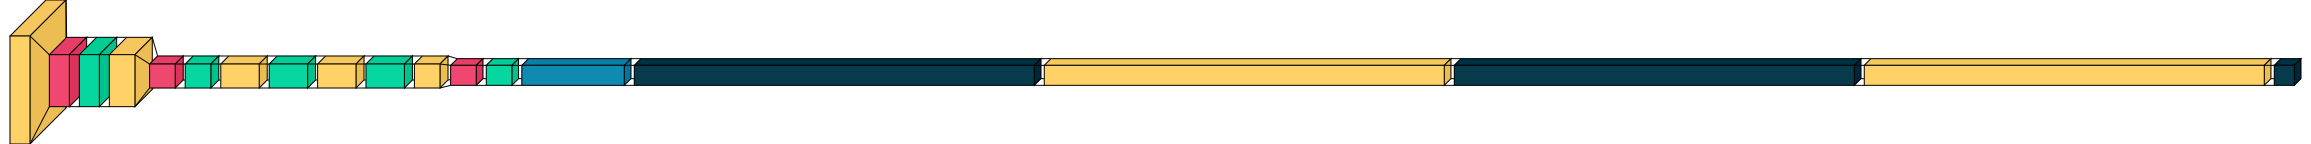

In [15]:
vk.layered_view(model)

In [19]:
# os.mkdir('/kaggle/working/alexnet/MyCheckpoint')
os.mkdir('/kaggle/working/alexnet/MyLogs')

In [20]:
checkpoint = ModelCheckpoint("/kaggle/working/alexnet/MyCheckpoint/best_model-{epoch:02d}-{val_accuracy:.02f}.h5",monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
log_csv = CSVLogger("/kaggle/working/alexnet/MyLogs/1_Linear_logs.csv", separator=',', append=False)

In [21]:
history = model.fit(x_train,y_train, validation_data=(x_validation,y_validation), verbose=1, epochs = 50, callbacks=[checkpoint,early_stop,log_csv])

Epoch 1/50
2444/2444 [==============================] - ETA: 0s - loss: 1.7886 - accuracy: 0.4941
Epoch 1: val_accuracy improved from -inf to 0.91457, saving model to /kaggle/working/alexnet/MyCheckpoint/best_model-01-0.91.h5
2444/2444 [==============================] - 45s 14ms/step - loss: 1.7886 - accuracy: 0.4941 - val_loss: 0.2986 - val_accuracy: 0.9146
Epoch 2/50
2442/2444 [============================>.] - ETA: 0s - loss: 0.2986 - accuracy: 0.9152
Epoch 2: val_accuracy improved from 0.91457 to 0.94333, saving model to /kaggle/working/alexnet/MyCheckpoint/best_model-02-0.94.h5
2444/2444 [==============================] - 33s 14ms/step - loss: 0.2987 - accuracy: 0.9152 - val_loss: 0.1933 - val_accuracy: 0.9433
Epoch 3/50
2441/2444 [============================>.] - ETA: 0s - loss: 0.1583 - accuracy: 0.9581
Epoch 3: val_accuracy improved from 0.94333 to 0.96942, saving model to /kaggle/working/alexnet/MyCheckpoint/best_model-03-0.97.h5
2444/2444 [==============================] - 3

In [22]:
scores = model.evaluate(x_train,y_train, verbose=0)
print("Training Accuracy: %.2f%% " % (scores[1]*100))

Training Accuracy: 99.75% 


In [23]:
scores = model.evaluate(x_validation,y_validation, verbose=0)
print("Validation Accuracy: %.2f%% " % (scores[1]*100))

Validation Accuracy: 98.99% 


In [24]:
scores = model.evaluate(x_test,y_test, verbose=0)
print("Test Accuracy: %.2f%% " % (scores[1]*100))

Test Accuracy: 83.55% 


In [26]:
model.load_weights("/kaggle/working/alexnet/MyCheckpoint/best_model-16-0.99.h5")
scores = model.evaluate(x_test,y_test)
print("Accuracy: %.2f%% " % (scores[1]*100))

288/288 [==============================] - 2s 6ms/step - loss: 0.9000 - accuracy: 0.8355
Accuracy: 83.55% 


In [27]:
model.save('/kaggle/workking/alexnet.h5')

Text(0, 0.5, 'acc')

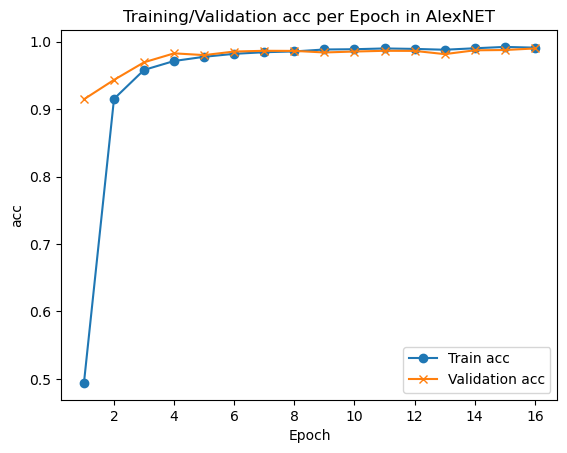

In [28]:
import matplotlib.pyplot as plt
f, ax = plt.subplots()
ax.plot([None] + history.history['accuracy'],'o-')
ax.plot([None] + history.history['val_accuracy'], 'x-')
ax.legend(['Train acc', 'Validation acc'], loc=0)
ax.set_title('Training/Validation acc per Epoch in AlexNET')
ax.set_xlabel('Epoch')
ax.set_ylabel('acc')

Text(0, 0.5, 'Loss')

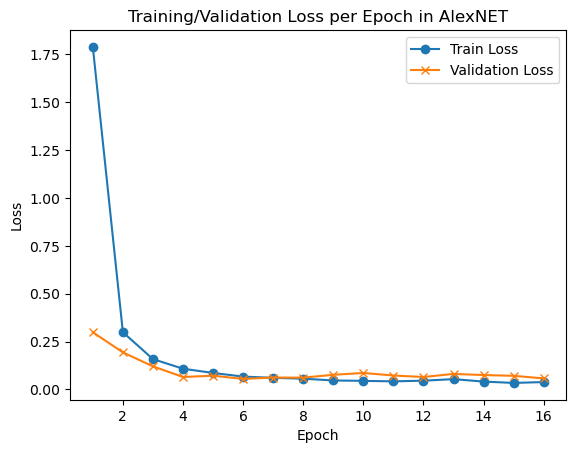

In [29]:
import matplotlib.pyplot as plt
f, ax = plt.subplots()
ax.plot([None] + history.history['loss'],'o-')
ax.plot([None] + history.history['val_loss'], 'x-')
ax.legend(['Train Loss', 'Validation Loss'], loc=0)
ax.set_title('Training/Validation Loss per Epoch in AlexNET')
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')

In [30]:
predictions = model.predict(x_test)
confusion = confusion_matrix( np.argmax(y_test, axis=1), np.argmax(predictions, axis=1) )

288/288 [==============================] - 1s 4ms/step


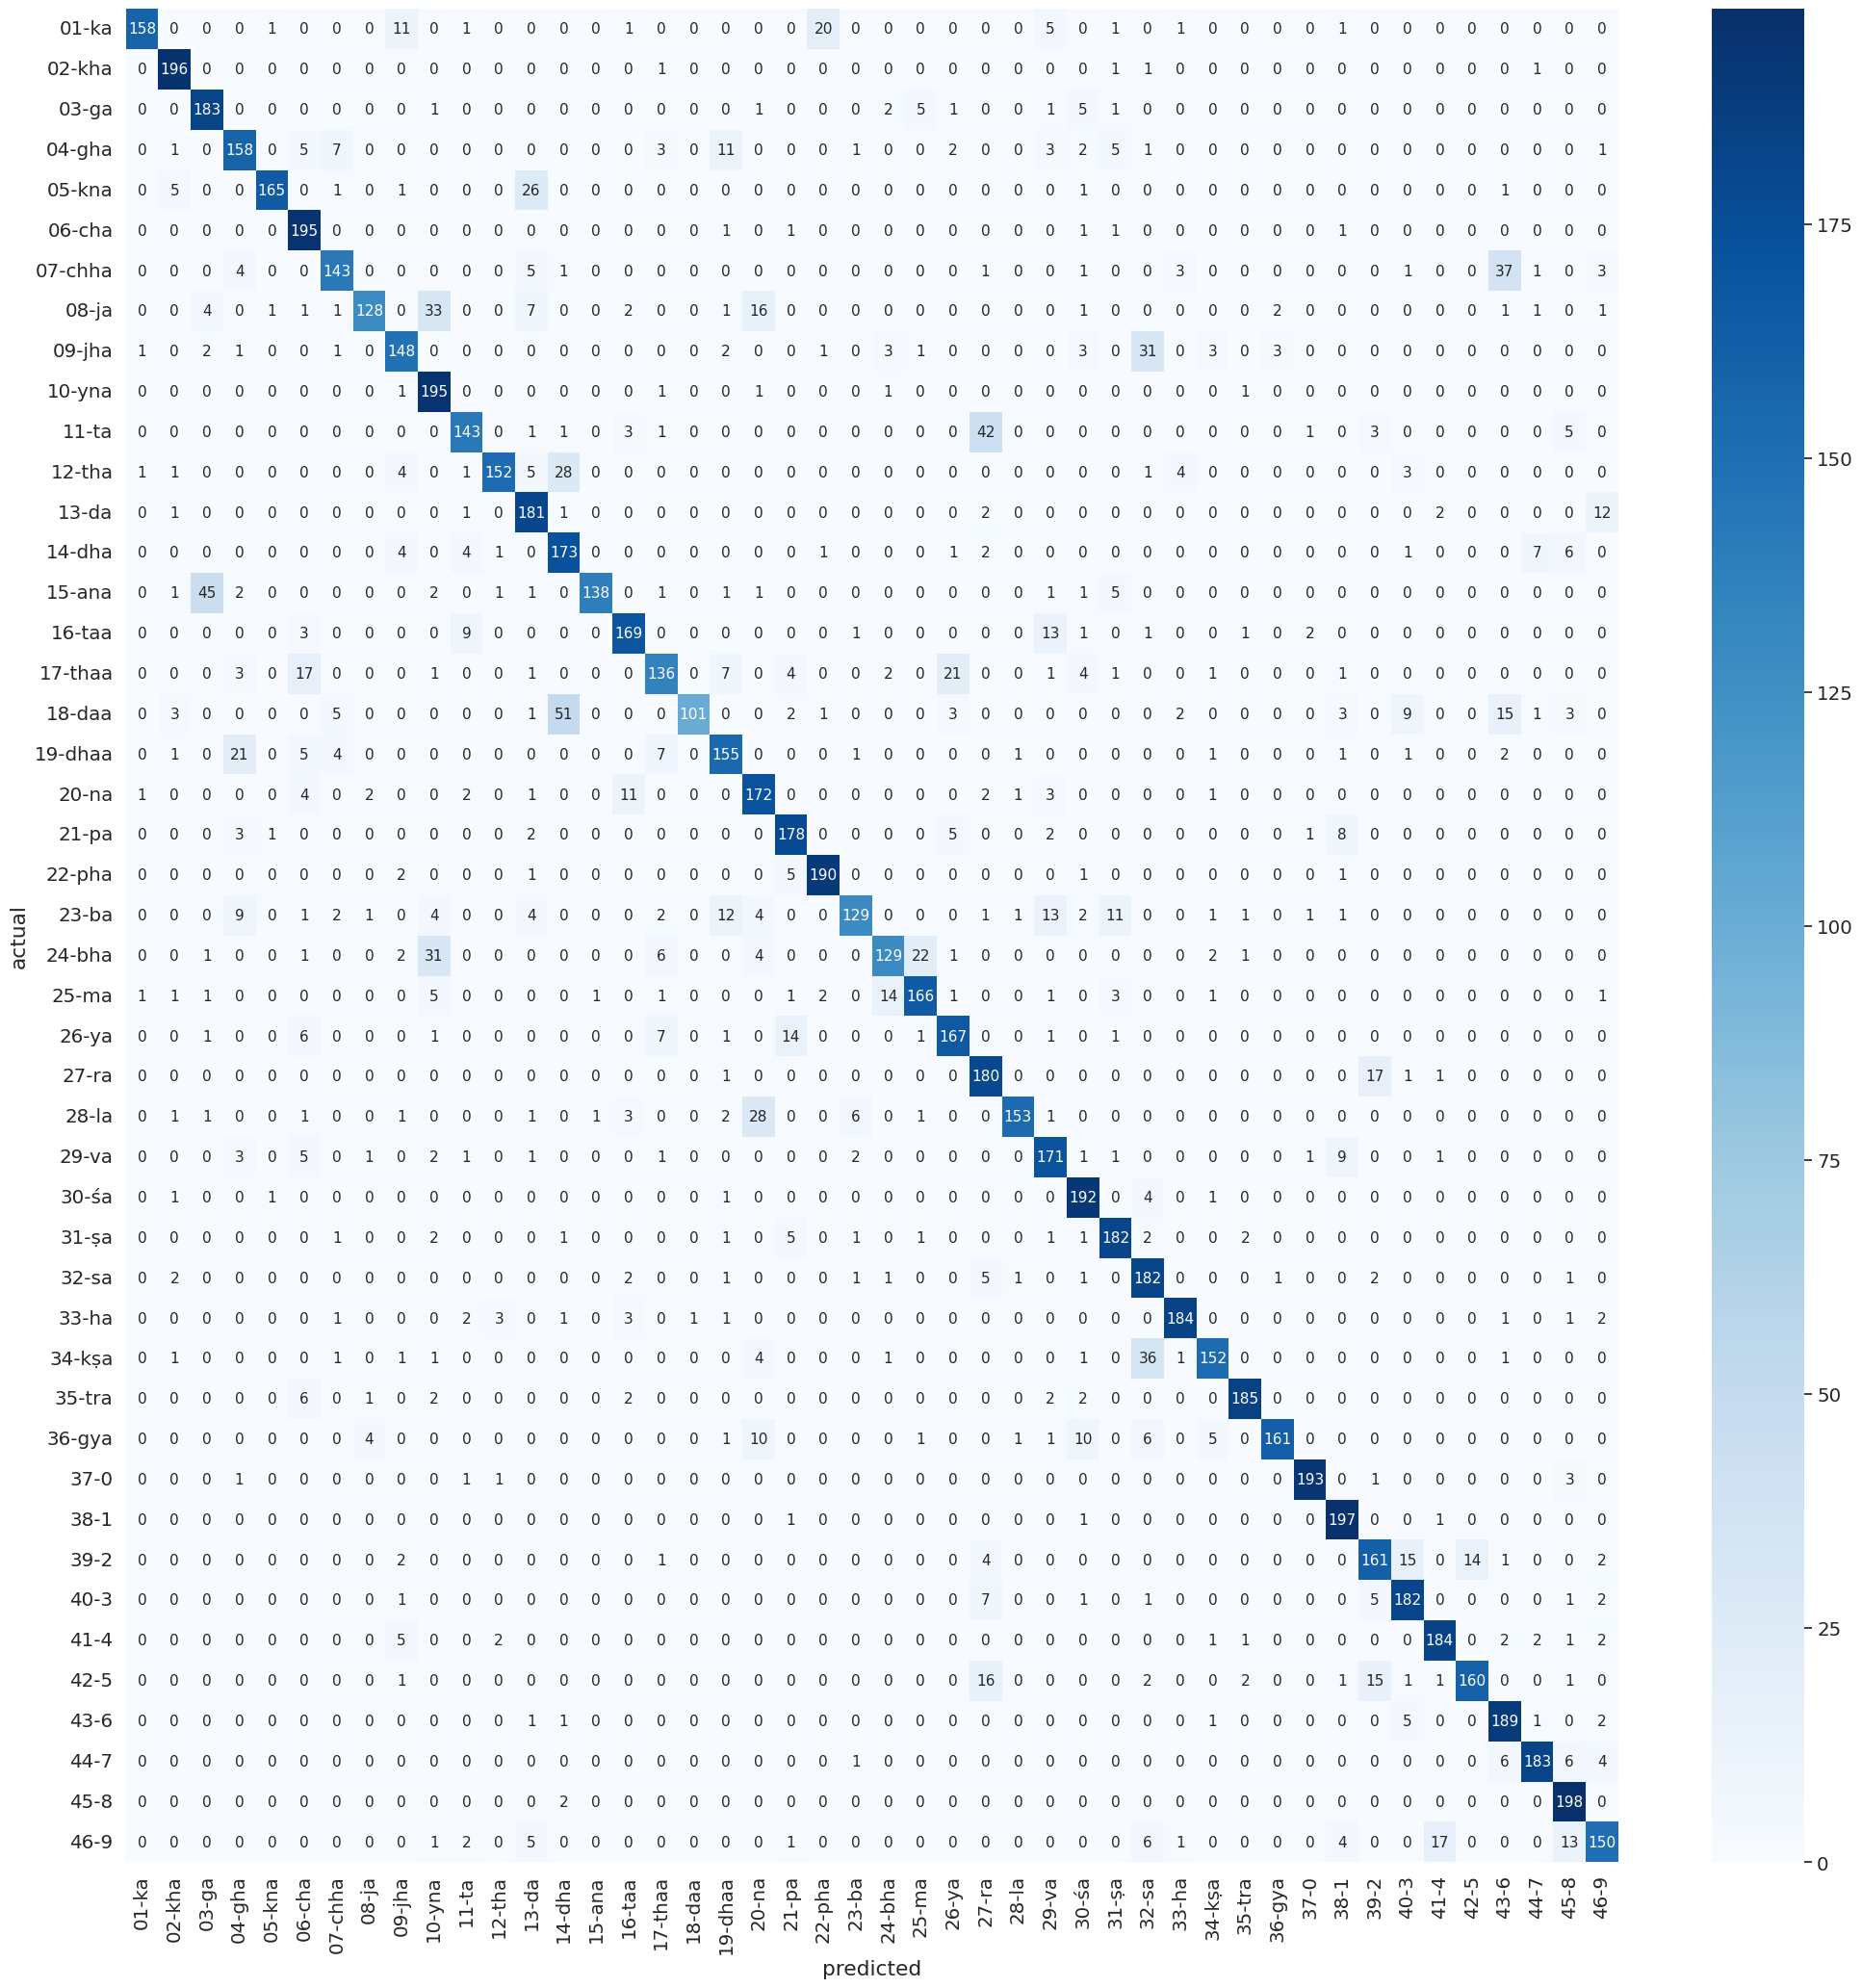

In [31]:
labels = ['01-ka', '02-kha', '03-ga', '04-gha', '05-kna', '06-cha', '07-chha', '08-ja', '09-jha', '10-yna', '11-ta', '12-tha', '13-da', '14-dha', '15-ana', '16-taa', '17-thaa', '18-daa', '19-dhaa', '20-na', '21-pa', '22-pha', '23-ba', '24-bha', '25-ma', '26-ya','27-ra', '28-la', '29-va', '30-śa', '31-ṣa', '32-sa', '33-ha', '34-kṣa','35-tra','36-gya','37-0','38-1','39-2','40-3','41-4','42-5','43-6','44-7','45-8','46-9']

df_cm = pd.DataFrame(confusion, columns=np.unique(labels), index = np.unique(labels))
df_cm.index.name = 'actual'
df_cm.columns.name = 'predicted'
plt.figure(figsize = (25,25))
sn.set(font_scale=1.3) 
sn.heatmap(df_cm, cmap="Blues", annot=True, annot_kws={"size": 11}, fmt="d")
plt.show()

In [32]:
print(classification_report( np.argmax(y_test, axis=1),np.argmax(predictions, axis=1)))

              precision    recall  f1-score   support

           0       0.98      0.79      0.87       200
           1       0.91      0.98      0.94       200
           2       0.77      0.92      0.84       200
           3       0.77      0.79      0.78       200
           4       0.98      0.82      0.89       200
           5       0.78      0.97      0.87       200
           6       0.86      0.71      0.78       200
           7       0.93      0.64      0.76       200
           8       0.80      0.74      0.77       200
           9       0.69      0.97      0.81       200
          10       0.86      0.71      0.78       200
          11       0.95      0.76      0.84       200
          12       0.74      0.91      0.82       200
          13       0.67      0.86      0.75       200
          14       0.99      0.69      0.81       200
          15       0.86      0.84      0.85       200
          16       0.81      0.68      0.74       200
          17       0.99    